# 1) IMPORTING LIBRARIES AND PACKAGES

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn import model_selection
import matplotlib.pyplot as plt
import model_utils
from geopy.geocoders import Nominatim, GeoNames
from geopy.extra.rate_limiter import RateLimiter
from geopy.distance import great_circle
import lightgbm as lgb

# 2) DATASET IMPORTING

In [3]:
prep_data = pd.read_csv('Data/prep_data.csv')

# 4) Classification

In [4]:
x_class = prep_data.drop(['Late_delivery_risk', 'Days for shipping (real)'],axis=1)
y_class = prep_data[['Late_delivery_risk']]
# train-test_split
x_train_class,x_test_class,y_train_class,y_test_class = model_selection.train_test_split(x_class,y_class,test_size=0.20,random_state=42,stratify=y_class)
# train-validation split
x_train_class,x_val_class,y_train_class,y_val_class = model_selection.train_test_split(x_train_class,y_train_class,test_size=0.25,random_state=42,stratify=y_train_class)

In [5]:
# Load models using pickle
nn_class = pickle.load(open('Models/nn_classifier.pkl', 'rb'))
xgb_class = pickle.load(open('Models/xgb_classifier.pkl', 'rb'))
models = [nn_class, xgb_class]

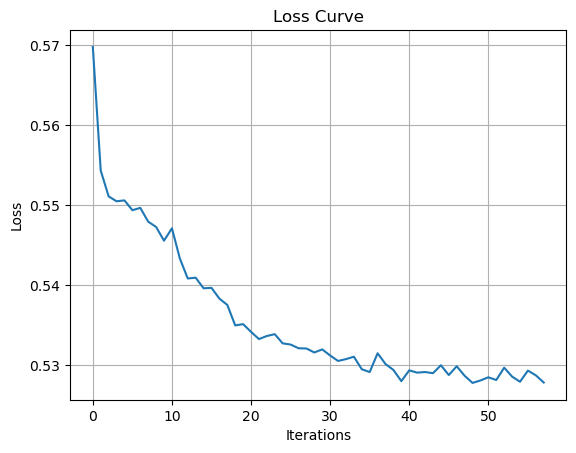

Accuracy for mlp_classifier_pipeline: 0.6893481717011128
ROC for mlp_classifier_pipeline: 0.7131621971346438
Report for mlp_classifier_pipeline:               precision    recall  f1-score   support

           0       0.59      0.88      0.71      5370
           1       0.86      0.55      0.67      7210

    accuracy                           0.69     12580
   macro avg       0.72      0.71      0.69     12580
weighted avg       0.74      0.69      0.69     12580

Accuracy for xgb_classifier_pipeline: 0.6748807631160573
ROC for xgb_classifier_pipeline: 0.6863313161680575
Report for xgb_classifier_pipeline:               precision    recall  f1-score   support

           0       0.59      0.76      0.67      5370
           1       0.78      0.61      0.68      7210

    accuracy                           0.67     12580
   macro avg       0.68      0.69      0.67     12580
weighted avg       0.70      0.67      0.68     12580



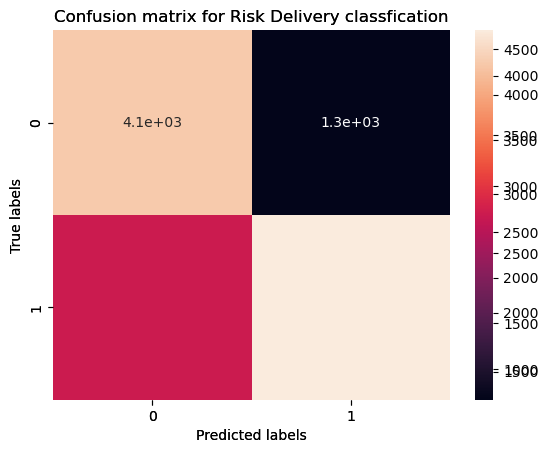

In [6]:
# Evaluate models
for model in models:
    preds = model_utils.predict(model, x_test_class)
    acc,roc,rep = model_utils.eval_classification(y_true=y_test_class,preds=preds)

In [7]:
importance_df = model_utils.get_ft_importance(x=x_train_class,model=models[1]["xgb_classifier_pipeline"], type='classification')
# Save feature importance
importance_df.to_csv('Data/feature_importance_class.csv', index=False)
importance_df

,Feature,Importance
0,Days for shipment (scheduled),0.479643
89,Shipping Mode_First Class,0.138699
91,Shipping Mode_Second Class,0.032947
37,Category Name_Golf Balls,0.005493
51,Category Name_Shop By Sport,0.004260
...,...,...
111,Product Quantity_Dell Laptop,0.000000
110,Product Quantity_DVDs,0.000000
106,Product Quantity_Cleveland Golf Women's 588 RT...,0.000000
104,Product Quantity_Children's heaters,0.000000


# 5) Regression

In [8]:
x_reg = prep_data.drop(['Late_delivery_risk', 'Days for shipping (real)'],axis=1)
y_reg = prep_data[['Days for shipping (real)']]
# train-test_split
x_train_reg,x_test_reg,y_train_reg,y_test_reg = model_selection.train_test_split(x_reg,y_reg,test_size=0.20,random_state=42,stratify=y_reg)
# train-validation split
x_train_reg,x_val_reg,y_train_reg,y_val_reg = model_selection.train_test_split(x_train_reg,y_train_reg,test_size=0.25,random_state=42,stratify=y_train_reg)

In [9]:
# Load models using pickle
nn_reg = pickle.load(open('Models/nn_regressor.pkl', 'rb'))
xgb_reg = pickle.load(open('Models/xgb_regressor.pkl', 'rb'))
models = [nn_reg, xgb_reg]

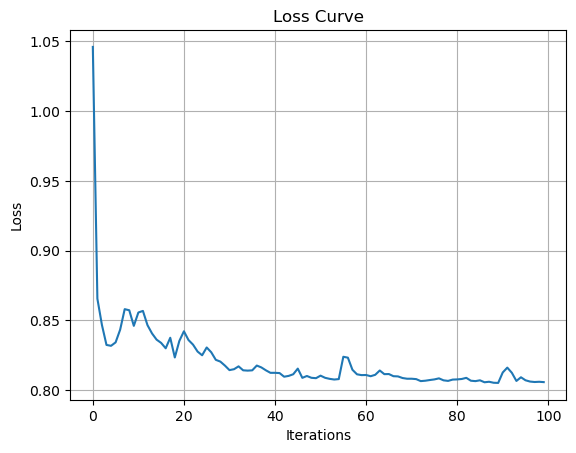

R2 for mlp_regressor_pipeline: 0.39070666100638696
MSE for mlp_regressor_pipeline: 1.6063919566956164
MAE for mlp_regressor_pipeline: 0.9860222419319647
R2 for xgb_regressor_pipeline: 0.36437125244222535
MSE for xgb_regressor_pipeline: 1.6758248321044273
MAE for xgb_regressor_pipeline: 1.03228930760366


In [10]:
for model in models:
    preds = model_utils.predict(model, x_test_reg)
    mse,mae,r2 = model_utils.eval_regression(y_true=y_test_reg,preds=preds)

In [11]:
importance_df = model_utils.get_ft_importance(x=x_train_reg,model=models[1]["xgb_regressor_pipeline"], type='regression')
# Save feature importance
importance_df.to_csv('Data/feature_importance_reg.csv', index=False)
importance_df

,Feature,Importance
0,Days for shipment (scheduled),0.180775
50,Category Name_Pet Supplies,0.012142
26,Category Name_Computers,0.011988
70,Department Name_Fitness,0.011944
46,Category Name_Men's Clothing,0.011832
...,...,...
130,Product Quantity_GolfBuddy VT3 GPS Watch,0.000000
67,Department Name_Book Shop,0.000000
119,Product Quantity_First aid kit,0.000000
118,Product Quantity_Fighting video games,0.000000
